In [2]:
%reload_ext autoreload
%autoreload 2

# incompatibilities with CMIPDownloader

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#import cmocean
import cartopy.crs as ccrs
import matplotlib as mpl
import json
import os
from scipy import stats

import sys
sys.path.append("..")
import utils
import plot_utils

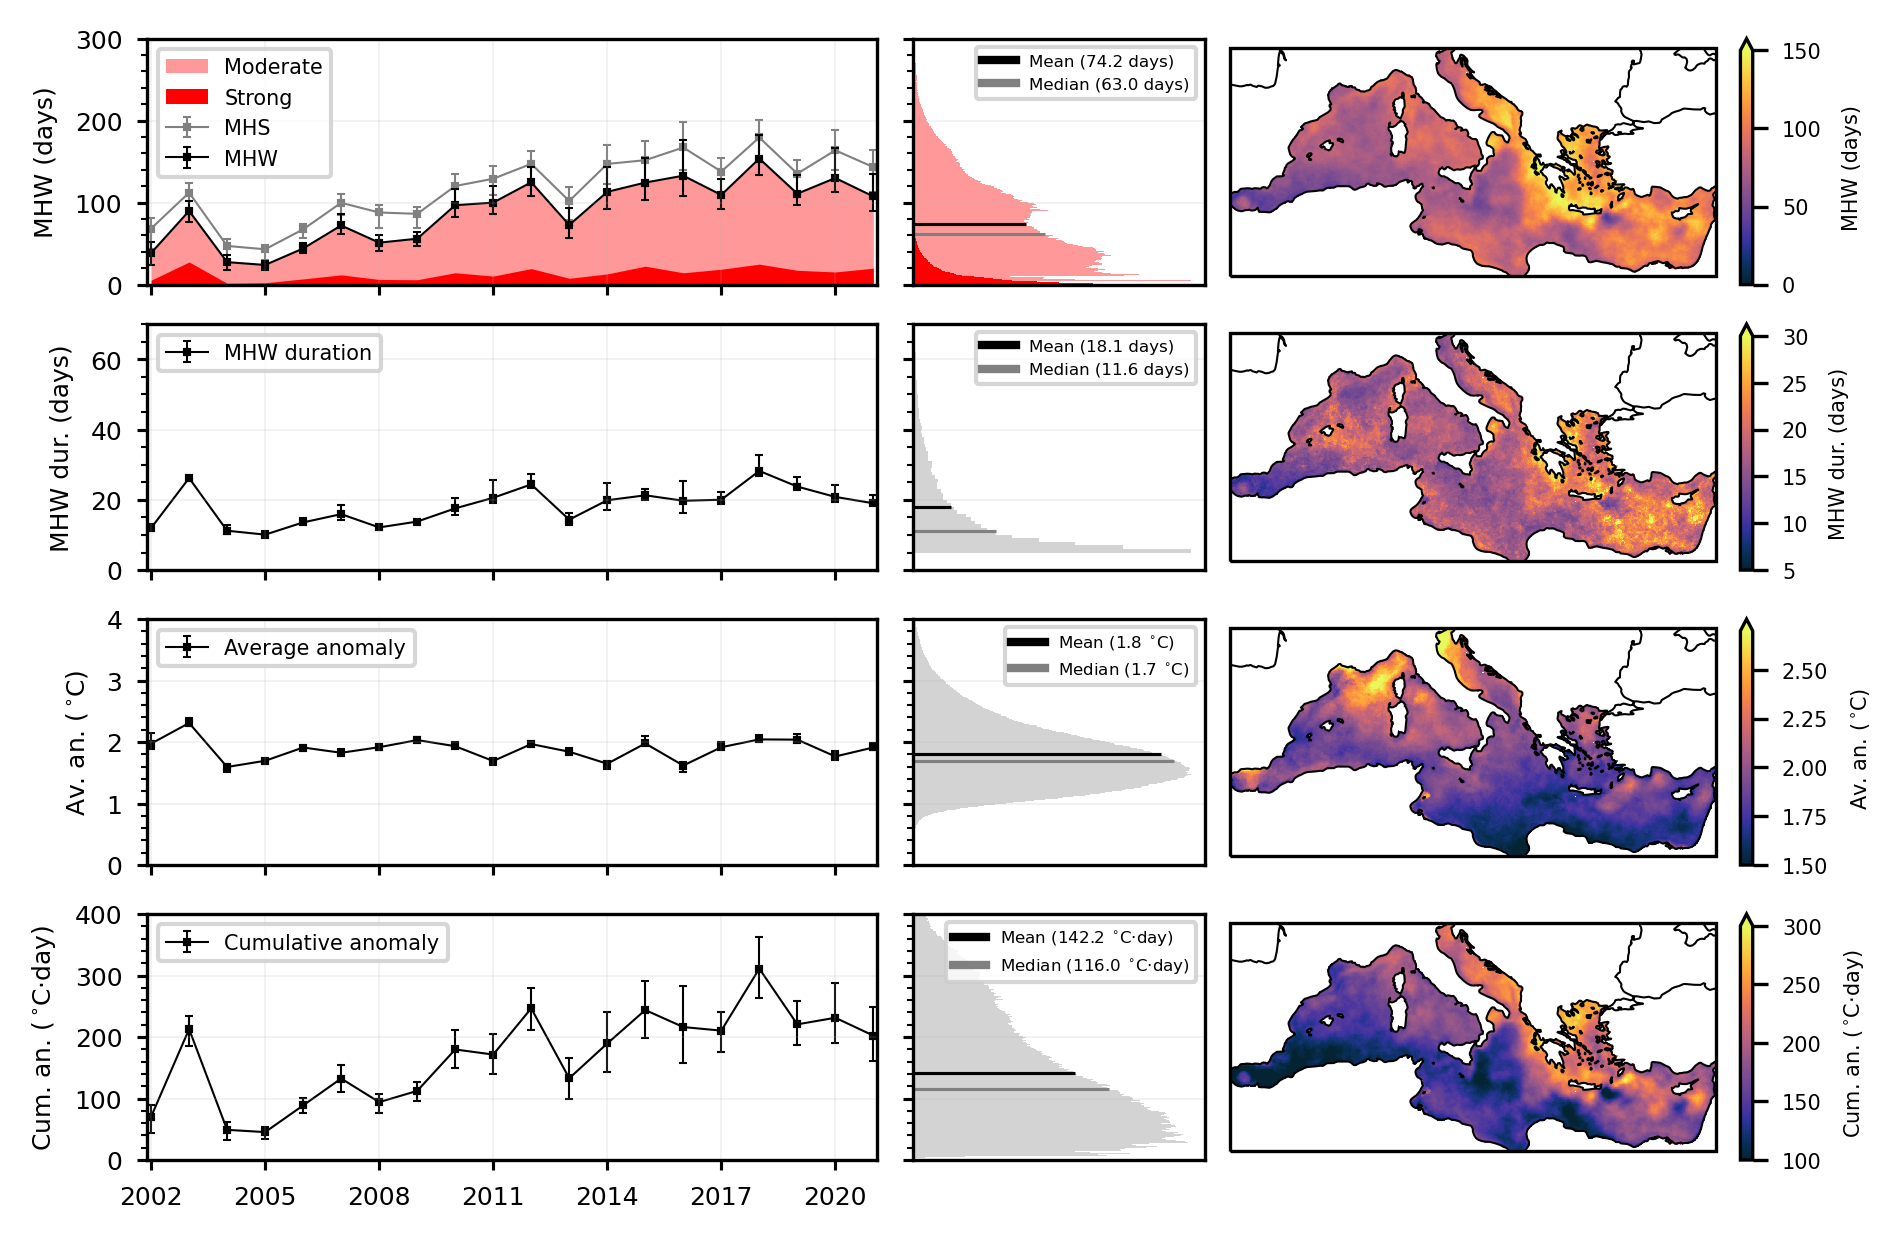

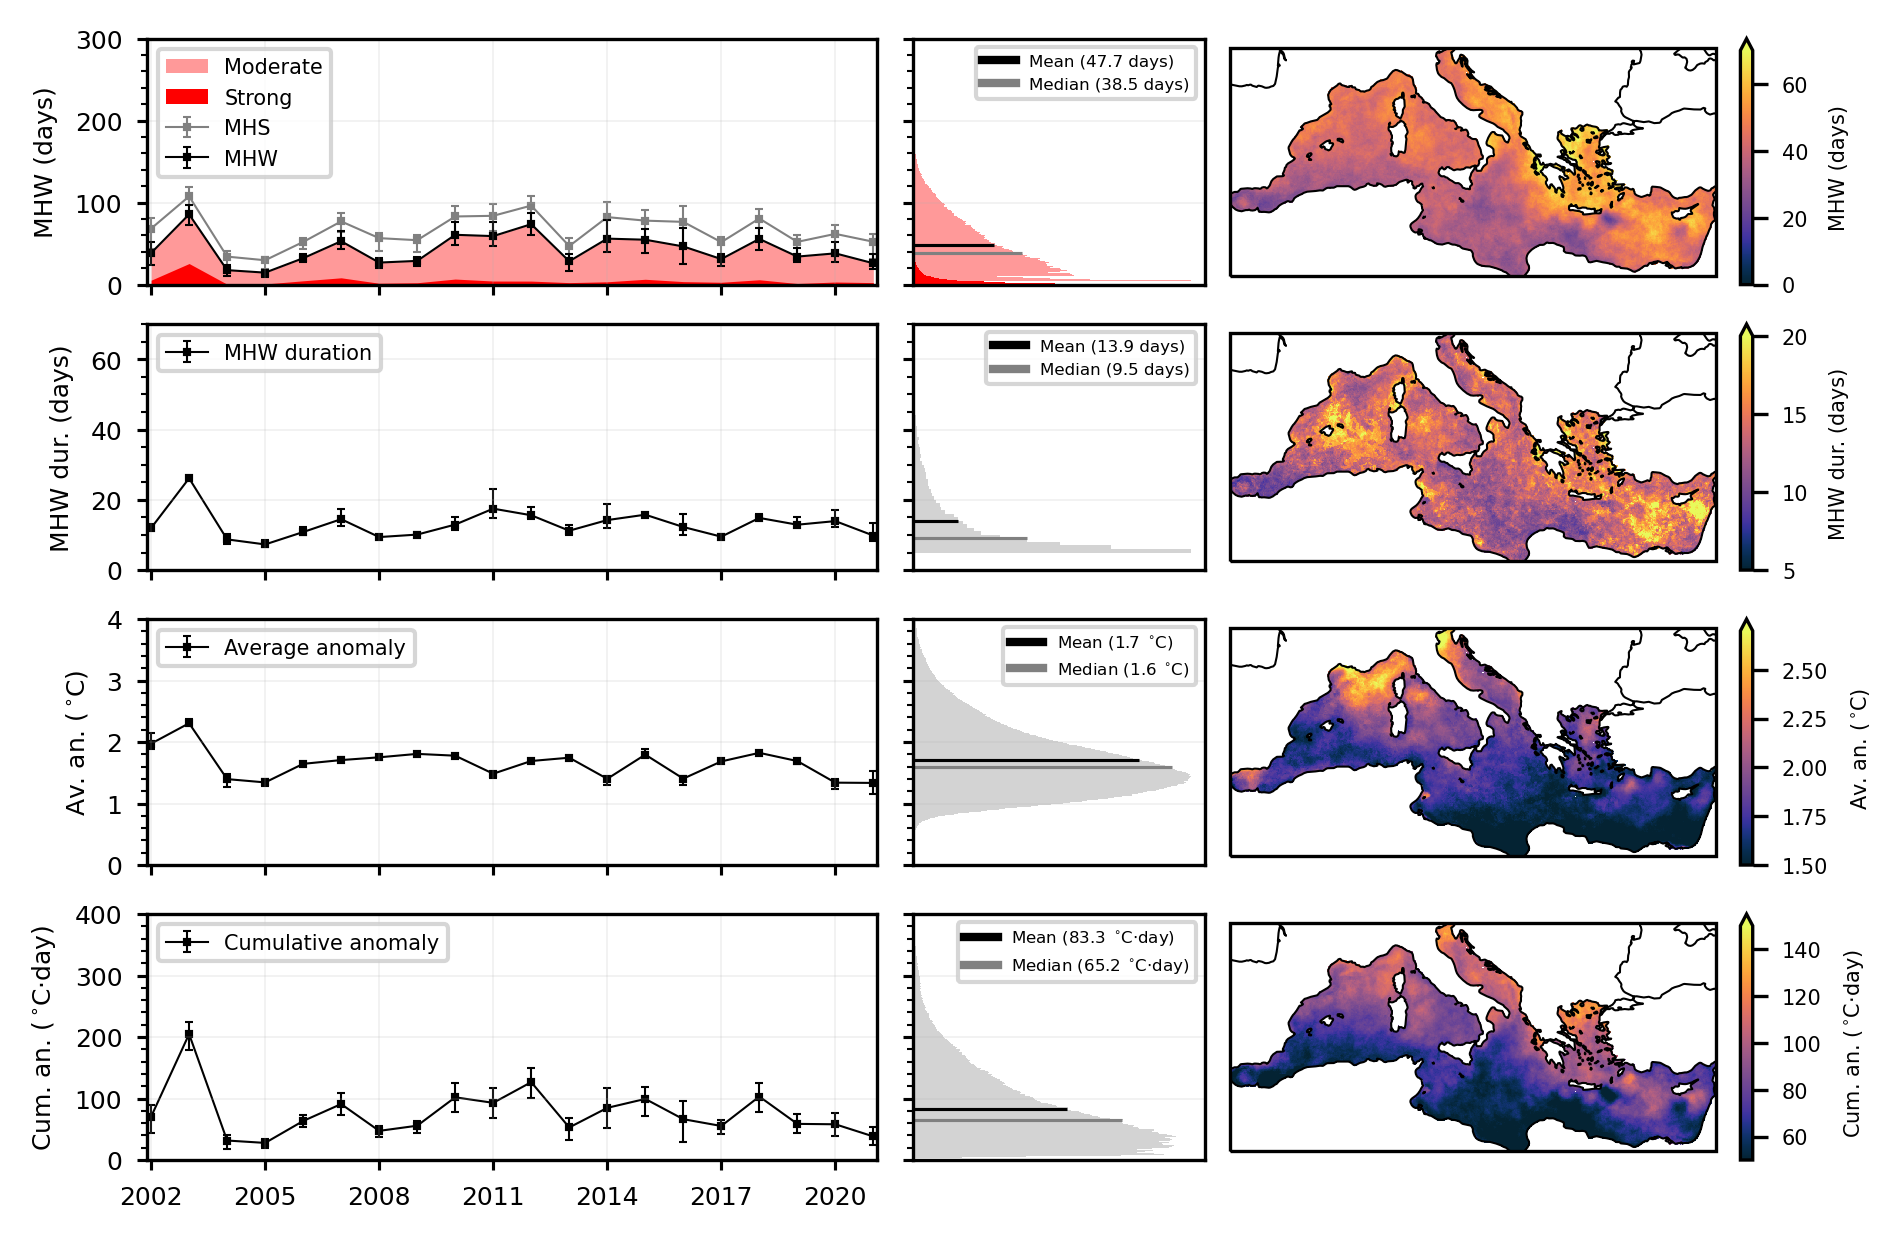

In [3]:
root_fold = "../../results/MHW/satellite/"

savefold = "../../figures/"

baselines = ['fixed_baseline', 'moving_baseline']

dss = {}

for baseline_type in baselines:
    savepath = f"{savefold}/fig_3_{baseline_type}.jpeg"

    if baseline_type == "fixed_baseline":
        map_lims = [[0, 150], [5, 30], [1.5, 2.7], [100, 300]]
    else:
        map_lims = [[0, 70], [5, 20], [1.5, 2.7], [50, 150]]

    baseline_years = 20

    fold = f"{root_fold}/{baseline_type}_{baseline_years}_year/"

    dss[baseline_type] = xr.open_mfdataset(f"{fold}/*.nc", combine="by_coords").compute()
    # lon_min = -1; lon_max = 5; lat_min = 37.5; lat_max = 42.5
    # ds = ds.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

    distributions = {}
    fold_distr = fold + "distributions/"
    for file in os.listdir(fold_distr):
        with open(f"{fold_distr}/{file}", "r") as infile:
            distributions[file[:-5]] = json.load(infile)
    metrics = list(distributions[file[:-5]].keys())
    distr_keys = list(distributions.keys())
    distributions["total"] = {}
    for metric in metrics:
        distributions["total"][metric] = {
            "hist": np.zeros(len(distributions[distr_keys[0]][metric]["hist"])),
            "bin_edges": distributions[distr_keys[0]][metric]["bin_edges"],
        }
        for key in distr_keys:
            distributions["total"][metric]["hist"] += np.array(
                distributions[key][metric]["hist"]
            )

    plot_utils.mhw_metrics(
        dss[baseline_type], distributions["total"], ratio=1.55, map_lims=map_lims, savepath=savepath
    )

In [49]:
lat = dss['fixed_baseline']['MHW'].lat
lon = dss['fixed_baseline']['MHW'].lon

for baseline_type in baselines:
    print(baseline_type)
    for metric in ['MHW', 'MHS', 'MHW_cat_2', 'MHW_cat_3' , 'mean_anomaly', 'cumulative_anomaly', 'mean_duration']:
        if metric not in ['MHW_cat_2', 'MHW_cat_3']:
            for type in ['', '_pos', '_neg']:
                    print(metric+type, end=': ')
                    labla = utils.weighted_mean(dss[baseline_type][metric+type]).values.mean()
                    print(f'{labla:.2f}')
        else:
             print(metric, end=': ')
             labla = utils.weighted_mean(dss[baseline_type][metric]).values.mean()
             print(f'{labla:.2f}')
        print('\n')


fixed_baseline
MHW: 88.99
MHW_pos: 103.68
MHW_neg: 69.32


MHS: 116.87
MHS_pos: 138.78
MHS_neg: 101.17


MHW_cat_2: 13.34


MHW_cat_3: 0.75


mean_anomaly: 1.88
mean_anomaly_pos: 1.90
mean_anomaly_neg: 1.94


cumulative_anomaly: 168.09
cumulative_anomaly_pos: 199.50
cumulative_anomaly_neg: 135.90


mean_duration: 18.22
mean_duration_pos: 19.33
mean_duration_neg: 15.81


moving_baseline
MHW: 43.13
MHW_pos: 53.98
MHW_neg: 31.64


MHS: 66.31
MHS_pos: 85.58
MHS_neg: 55.94


MHW_cat_2: 4.84


MHW_cat_3: 0.16


mean_anomaly: 1.66
mean_anomaly_pos: 1.70
mean_anomaly_neg: 1.66


cumulative_anomaly: 76.54
cumulative_anomaly_pos: 96.63
cumulative_anomaly_neg: 59.16


mean_duration: 12.97
mean_duration_pos: 14.05
mean_duration_neg: 10.94




In [33]:
43.1/365

a = utils.weighted_mean(dss['fixed_baseline']['cumulative_anomaly']).values
# a
#make a linear fit of a
x = np.arange(len(a))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, a)
slope

9.254854515681588

In [15]:
baseline = 'moving_baseline'

cat_1 = dss[baseline]['MHW'].mean(['lat', 'lon', 'time']).values
cat_2 = dss[baseline]['MHW_cat_2'].mean(['lat', 'lon', 'time']).values

0.20273972602739726

In [66]:
# Change to 'distr_{year}' for other specific year statistics.

period = 'total'

total = sum(distributions[period]['MHW_event_duration']['hist'])
month = sum(distributions[period]['MHW_event_duration']['hist'][:31])

(1 - month/total)*100

8.613445926634878

In [60]:
distributions

{'distr_2014': {'MHS_days_year': {'hist': [0.0,
    179.0,
    149.0,
    272.0,
    315.0,
    449.0,
    601.0,
    794.0,
    1032.0,
    1491.0,
    2084.0,
    2681.0,
    3495.0,
    4413.0,
    4901.0,
    5464.0,
    5839.0,
    6101.0,
    6489.0,
    6843.0,
    7395.0,
    7929.0,
    8937.0,
    9115.0,
    9402.0,
    9869.0,
    9943.0,
    10160.0,
    10158.0,
    10359.0,
    10445.0,
    10680.0,
    10391.0,
    10269.0,
    9889.0,
    9701.0,
    9852.0,
    9878.0,
    9944.0,
    10000.0,
    9864.0,
    10008.0,
    9731.0,
    9842.0,
    9678.0,
    10071.0,
    10027.0,
    9890.0,
    9893.0,
    9805.0,
    9930.0,
    9806.0,
    9746.0,
    9624.0,
    9603.0,
    9485.0,
    9399.0,
    9072.0,
    9069.0,
    8895.0,
    8787.0,
    8686.0,
    8621.0,
    8534.0,
    8313.0,
    8560.0,
    8584.0,
    8509.0,
    8592.0,
    8463.0,
    8236.0,
    8062.0,
    8011.0,
    7826.0,
    7920.0,
    8023.0,
    7789.0,
    7712.0,
    7692.0,
    7721.0,


In [43]:
distributions['total']['MHW_event_duration']['bin_edges']

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0